# Project 2 – Part 1 (Full + Extra Credit)
**Course:** MATH 014 (04) — Introduction to Data Science Honors  
**Student Name:** Manjil Rawal  
**Student ID:** _<enter your ID here>_  
**Date:** 2025-10-31 21:16

This notebook follows the assignment rubric exactly and adds a clearly-labeled **Extra Credit** section with two simple visual analyses (matplotlib only).

## 1. Dataset Information
**Title / Topic:** Students' Social Media Addiction vs. Relationships  
**Source (link):** https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships  

**Brief real‑world context / purpose:**  
Cross‑country survey of students’ social‑media behaviors and related outcomes: daily usage hours, most‑used platform, sleep, mental‑health score, relationship status, conflicts over social media, and an addiction score.

## Setup and Load

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 140)

csv_path = "Project_data.csv"   
df = pd.read_csv(csv_path)
print("✅ Loaded:", csv_path)
print("Shape:", df.shape)
df.head()

✅ Loaded: Project_data.csv
Shape: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## 2. Basic Data Exploration

In [2]:
df.shape

(705, 13)

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [5]:
list(df.columns)

['Student_ID',
 'Age',
 'Gender',
 'Academic_Level',
 'Country',
 'Avg_Daily_Usage_Hours',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Sleep_Hours_Per_Night',
 'Mental_Health_Score',
 'Relationship_Status',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

## 3. Data Types and Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
categorical_cols = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
Categorical columns: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']


## 4. Descriptive Summary

In [8]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [9]:
print(f"Mean daily usage hours: {df['Avg_Daily_Usage_Hours'].mean():.2f}; Median: {df['Avg_Daily_Usage_Hours'].median():.2f}")
print(f"Mean sleep hours per night: {df['Sleep_Hours_Per_Night'].mean():.2f}; Median: {df['Sleep_Hours_Per_Night'].median():.2f}")
print(f"Mean mental health score: {df['Mental_Health_Score'].mean():.2f}; Mean addicted score: {df['Addicted_Score'].mean():.2f}")

Mean daily usage hours: 4.92; Median: 4.80
Mean sleep hours per night: 6.87; Median: 6.90
Mean mental health score: 6.23; Mean addicted score: 6.44


## 5. Missing or Duplicate Data

In [10]:
missing = df.isna().sum().to_frame('missing_count')
missing['missing_%'] = (missing['missing_count'] / len(df) * 100).round(2)
missing

,missing_count,missing_%
Student_ID,0,0.0
Age,0,0.0
Gender,0,0.0
Academic_Level,0,0.0
Country,0,0.0
Avg_Daily_Usage_Hours,0,0.0
Most_Used_Platform,0,0.0
Affects_Academic_Performance,0,0.0
Sleep_Hours_Per_Night,0,0.0
Mental_Health_Score,0,0.0


In [11]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


## Data Wrangling

### 6. Add a New Column Using Existing Columns

In [12]:
df_new = df.copy()
max_conflict = df_new['Conflicts_Over_Social_Media'].max()
df_new['Conflict_Normalization'] = (df_new['Conflicts_Over_Social_Media'] / max_conflict) * 100
usage_median = df_new['Avg_Daily_Usage_Hours'].median()
df_new['Heavy_User'] = (df_new['Avg_Daily_Usage_Hours'] > usage_median).astype(int)
df_new[['Avg_Daily_Usage_Hours','Conflicts_Over_Social_Media','Conflict_Normalization','Heavy_User']].head()

,Avg_Daily_Usage_Hours,Conflicts_Over_Social_Media,Conflict_Normalization,Heavy_User
0,5.2,3,60.0,1
1,2.1,0,0.0,0
2,6.0,4,80.0,1
3,3.0,1,20.0,0
4,4.5,2,40.0,0


### 7. Filter the Data (Two Different Filters)

In [13]:
if 'Gender' in df_new.columns:
    top_gender = df_new['Gender'].value_counts().idxmax()
    filtered_a = df_new[df_new['Gender'] == top_gender]
    print("Filter A — Gender == ", top_gender, " -> shape:", filtered_a.shape)
    display(filtered_a.head())
else:
    print("No 'Gender' column found; skipping Filter A.")

Filter A — Gender ==  Female  -> shape: (353, 15)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Conflict_Normalization,Heavy_User
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,60.0,1
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,80.0,1
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9,100.0,1
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8,40.0,1
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4,20.0,0


In [14]:
filtered_b = df_new[(df_new['Conflict_Normalization'] > 50) & (df_new['Heavy_User'] == 1)]
print("Filter B — High-conflict heavy users -> shape:", filtered_b.shape)
filtered_b.head()

Filter B — High-conflict heavy users -> shape: (315, 15)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Conflict_Normalization,Heavy_User
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,60.0,1
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,80.0,1
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9,100.0,1
13,14,18,Female,High School,Mexico,6.5,Instagram,Yes,5.5,5,Single,4,9,80.0,1
17,18,19,Female,High School,Norway,5.0,Instagram,Yes,5.7,5,In Relationship,3,8,60.0,1


### 8. Unique Values and Categories

In [15]:
for c in categorical_cols:
    print(f"\nColumn: {c}")
    display(df_new[c].value_counts(dropna=False))


Column: Gender


Gender
Female    353
Male      352
Name: count, dtype: int64


Column: Academic_Level


Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


Column: Country


Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64


Column: Most_Used_Platform


Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


Column: Affects_Academic_Performance


Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


Column: Relationship_Status


Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

## 9. Summary and Conclusion — Initial Observations

Write 4–6 sentences summarizing usage, sleep, conflicts, platform popularity, and any data quality issues you saw. Mention how you might explore differences between subsets in Part 2.

---

## ⭐ Extra Credit 

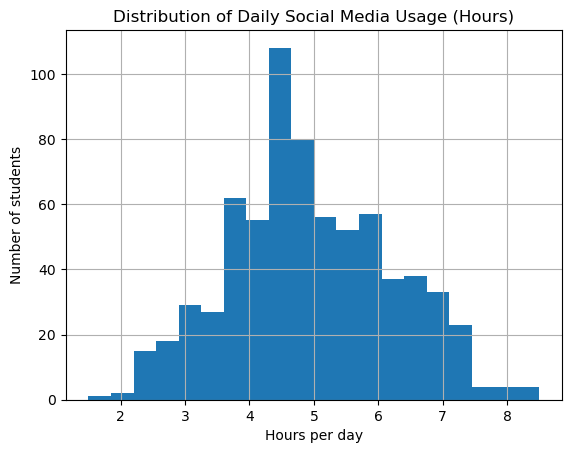

In [16]:
# EC Visual 1 — Distribution of Avg_Daily_Usage_Hours
plt.figure()
df_new['Avg_Daily_Usage_Hours'].dropna().hist(bins=20)
plt.title("Distribution of Daily Social Media Usage (Hours)")
plt.xlabel("Hours per day")
plt.ylabel("Number of students")
plt.show()

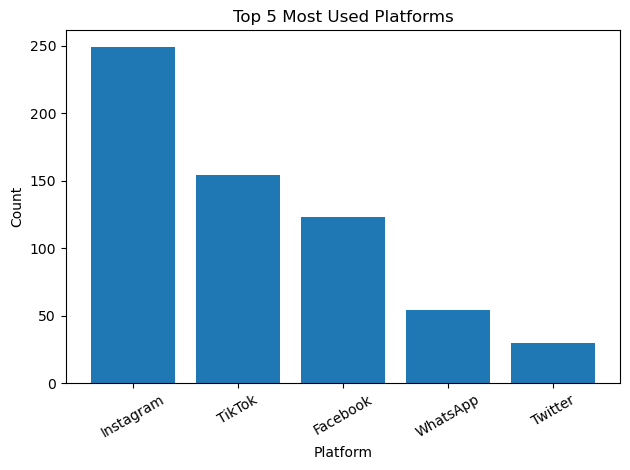

In [17]:
# EC Visual 2 — Top 5 Most Used Platforms
if 'Most_Used_Platform' in df_new.columns:
    top5 = df_new['Most_Used_Platform'].value_counts().head(5)
    plt.figure()
    plt.bar(top5.index.astype(str), top5.values)
    plt.title("Top 5 Most Used Platforms")
    plt.xlabel("Platform")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

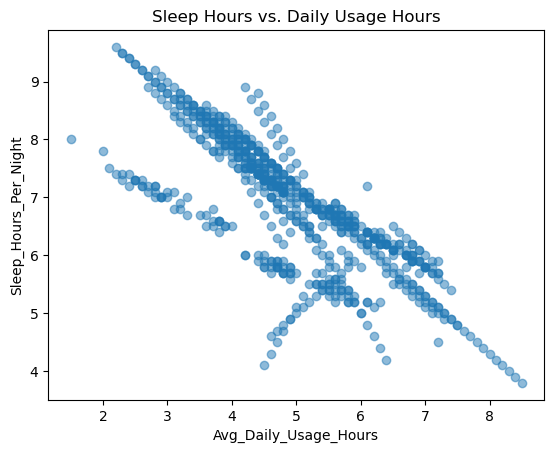

Pearson correlation (usage vs sleep): -0.791


In [18]:
# EC Bonus — Sleep vs Usage scatter + correlation
x = df_new['Avg_Daily_Usage_Hours'].astype(float)
y = df_new['Sleep_Hours_Per_Night'].astype(float)
mask = x.notna() & y.notna()
xv, yv = x[mask], y[mask]

plt.figure()
plt.scatter(xv, yv, alpha=0.5)
plt.title("Sleep Hours vs. Daily Usage Hours")
plt.xlabel("Avg_Daily_Usage_Hours")
plt.ylabel("Sleep_Hours_Per_Night")
plt.show()

if len(xv) > 1:
    corr = np.corrcoef(xv, yv)[0,1]
    print(f"Pearson correlation (usage vs sleep): {corr:.3f}")

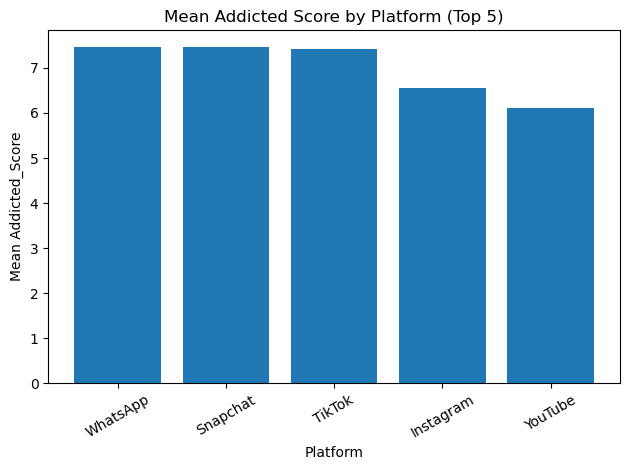

In [19]:
# EC Bonus — Mean Addicted_Score by Platform (Top 5)
if 'Most_Used_Platform' in df_new.columns:
    plat_means = df_new.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).head(5)
    plt.figure()
    plt.bar(plat_means.index.astype(str), plat_means.values)
    plt.title("Mean Addicted Score by Platform (Top 5)")
    plt.xlabel("Platform")
    plt.ylabel("Mean Addicted_Score")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    plat_means